<a href="https://colab.research.google.com/github/varsantos/Data_science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conheci o dataset Titanic desde o início das minhas aulas de ciência de dados. Sua simplicidade me permite focar nos algoritmos e técnicas, enquanto a complexidade da questão principal (quem sobreviveu e por quê?) me mantém engajado e curioso.

Escolhi este dataset por diversos motivos:


*   Popularidade: O Titanic é um evento histórico amplamente conhecido, tornando o dataset interessante e fácil de se conectar, além de ser um conjunto de dados clássico para aprendizado de Machine Learning.

*   Acessibilidade: O dataset Titanic é facilmente encontrado em plataformas como o Kaggle.

*   Tamanho ideal: Ele é grande o suficiente para ser desafiador, mas pequeno o suficiente para ser processado em um computador pessoal sem grandes dificuldades.

*   Riqueza de informações: O dataset contém uma variedade de tipos de dados, incluindo numéricos, categóricos e textuais, permitindo a exploração de diferentes técnicas de Machine Learning e a aplicação de conceitos como tratamento de valores ausentes e outliers.
*   Comunidade engajada: A comunidade online em torno do dataset Titanic é vasta, com muitos recursos, tutoriais e discussões disponíveis, o que facilita o aprendizado e a troca de ideias.

Acredito que o dataset Titanic é uma excelente escolha para quem está começando a aprender Machine Learning, pois ele oferece uma ótima oportunidade para praticar habilidades essenciais, como análise exploratória de dados, pré-processamento, visualização e modelagem, além de desenvolver uma intuição para a área.

[Link para download Dataset](https://www.kaggle.com/competitions/titanic/data)


`Realizado por Vagner Santos`


Problema: Prever a sobrevivência dos passageiros utilizando técnicas de EDA, ETL e algoritmo de Machine Learning para realizar as previsões.


# **ETL**
Extract, Transform and Load

In [122]:
#ubindo o dataset no GoogleColab
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [123]:
#importando bibliotecas e lendo o arquivo csv

import pandas as pd
import numpy as np

titanic_train = pd.read_csv('train.csv')
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Dicionário dos dados**

1.   PassengerId - *IDs de todos os passageiros*
2.   Survived - *Identificação se passageiro sobreviveu ou não (0 = No, 1 = Yes)*
3.   Pclass - *Classe que passageiro viajava (1 classe, 2 classe e 3 classe)*
4.   Name - *Nome do passageiro*
5.   Sex - *Genêro*
6.   Age - *Idade do passageiro*
7.   SibSp - *Define as relações familiares (irmão, irmã, marido e esposa)*
8.   Parch - *Define a relação Familiar (pai, mãe, filho, filha)*
9.   Ticket - *número do bilhete de embarque*
10.  Fare - *Tarifa do passageiro*
11.  Cabin -  *Número da cabine*
12.  Embarked - *Porto de embarcação (C = Cherbourg, Q = Queenstown, S = Southampton)*

**Entendendo os dados**


Como esse Dataset já está separado em Train e Test, Não precisamos fazer a separação, Mas no mundo real esses dados estão todos juntos e assim devemos usar uma função de separação automatica de treino e teste. Abaixo vou exemplificar como funcionaria o algoritimo se fosse uma base única. Porém nós iremos usar o mesmo algoritmo posteriormente.

```
#instalando o scikit-learn
!pip install scikit-learn

#importando
from sklearn.model_selection import train_test_split

#removendo a coluna target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

#separando a base em 30% para teste e instanciando 42 para quem rodar obter o mesmo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

```




In [124]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
titanic_train.describe()
#anlise univariada

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Já podemos analisar que o `PassengerId` está bem distribuido, e todos os passageiros tem um ID, também podemos analisar que a `média de idade` é de `29 anos` e a `mediana` é de `28 anos`, mas se olhar o `"Fare"` a `média` é de `32.20` e temos um valor máximo de `512` assim teremos que analisar posteriormente esses dados, mas parece que  existe uma distribuição dos dados próximo do normal

In [126]:
titanic_train.nunique()

#podemos perceber que realmente o passengerId é único para cada passageiro, e talvez possamos desconsiderado na análise.

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [127]:
#verificando se temos valores nulos no dataset

titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Podemos notar que temos 177 passageiros sem a idade informada, 687 sem número de cabine, e 2 sem o local de embarque.

# **EDA**

Exploratory Data Analysis

Existe uma biblioteca de ciência de dados poderosa chamada `Ydata Profiling` ela é capaz de gerar um relatório completo e detalhado de EDA.



In [128]:
!pip install ydata-profiling
import ydata_profiling as yd

In [129]:
profile = yd.ProfileReport(titanic_train, title="Titanic EDA Report")
profile.to_file("titanic_EDA.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7b28545edfd0, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[TITANIC EDA REPORT](https://drive.google.com/file/d/17mznY1_CFWUfnwPIp_D3P761-7W5vy7T/view?usp=sharing)

Mas como eu quero fixar meus conhecimentos adquiridos vou realizar algumas análises manualmente.

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#tenho curiosidade para saber quantos passageiros morreram e sobreviveram por classe

#agrupar os sobreviventes por classe usando o groupby e fazer uma contagem de vivos e mortos com coount(), e para desempilhar os dados usei o unstack()
sobreviventes_por_classe = titanic_train.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
sobreviventes_por_classe

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


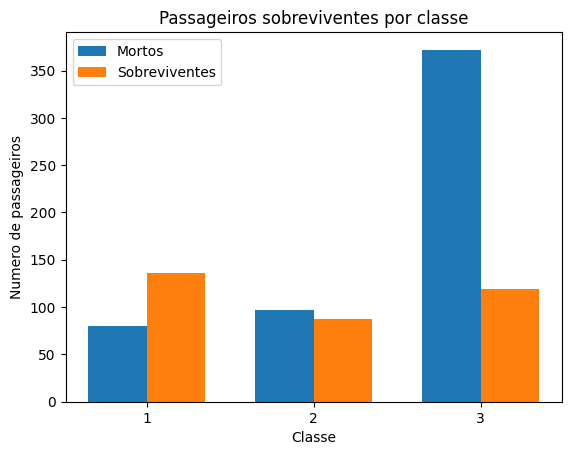

In [132]:
#analise bivariada

#definindo o tamanho do grafico e a lagura das barras
largura_barra = 0.35
posicoes = range(len(sobreviventes_por_classe.index))

plt.bar(posicoes, sobreviventes_por_classe[0], width=largura_barra, label='Mortos') #criando uma barra para os mortos
plt.bar([p + largura_barra for p in posicoes], sobreviventes_por_classe[1], largura_barra, label='Sobreviventes') #criando uma barra para os vivos

#rotulando a área do gráfico
plt.xlabel('Classe')
plt.ylabel('Numero de passageiros')
plt.title('Passageiros sobreviventes por classe')
plt.xticks([p + largura_barra / 2 for p in posicoes], sobreviventes_por_classe.index)
plt.legend()

plt.show()

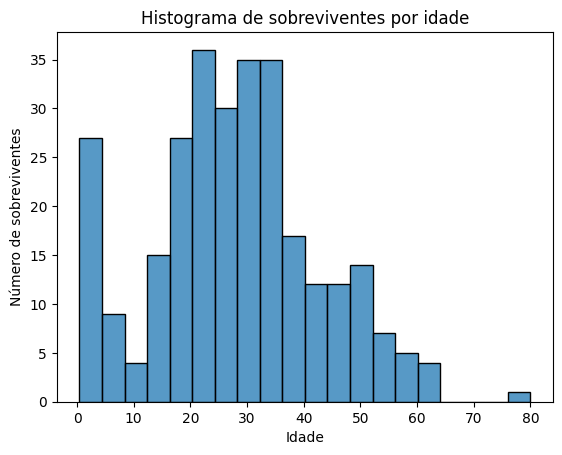

In [133]:
#vamos entender a relação da idade com a sobrevivência

sns.histplot(data=titanic_train[titanic_train['Survived'] == 1], x='Age', bins=20) #utilizando a função histplot do seaborn para plotar o histograma, Filtramos o survived= 1 para todos que sobreviveram e usamos a idade no eixo x.
plt.xlabel('Idade')
plt.ylabel('Número de sobreviventes')
plt.title('Histograma de sobreviventes por idade')
plt.show()

Como podemos ver anteriormente as pessoas da 1º Classe foram as pessoas que tiveram chance de sobrevivencia, assim como bebes e adultos entre 18 a 35 anos

In [134]:
#vamos fazer uma conta para saber em porcentagem a chance de sobrevivência por classe
total_por_classe = sobreviventes_por_classe.sum(axis=1)
percentual_sobreviventes = sobreviventes_por_classe[1] / total_por_classe * 100
percentual_mortos = sobreviventes_por_classe[0] / total_por_classe * 100

In [135]:
#vamos concatenar essa conta ao dataset q criei pra analisar os dados de sobrevivência

porcentagens = pd.DataFrame({'Percentual Sobreviventes' : percentual_sobreviventes,'Percentual Mortos': percentual_mortos})
sobreviventes_por_classe = pd.concat([sobreviventes_por_classe, porcentagens], axis=1)
sobreviventes_por_classe

,0,1,Percentual Sobreviventes,Percentual Mortos
Pclass,,,,
1,80,136,62.962963,37.037037
2,97,87,47.282609,52.717391
3,372,119,24.236253,75.763747


In [136]:
#vamos verificar quem são os passageiros que não tem local de embarque

titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Buscando o nome das duas mulheres no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/), conseguimos saber onde elas embarcaram que foi no Southampton

In [137]:
#substituindo os valores nulos de embarque

titanic_train['Embarked'].fillna('S', inplace=True)
#esta funçao vai filtrar tudo que está NaN e vai substituir por "S", respeitando o dicionário de dados informados no início


Como temos 177 pessoas sem idade, é inviável fazer a mesma coisa que realizamos anteriormente, então podemos usar de técnicas estatiscas para colocar a idade dessas pessoas

<Axes: >

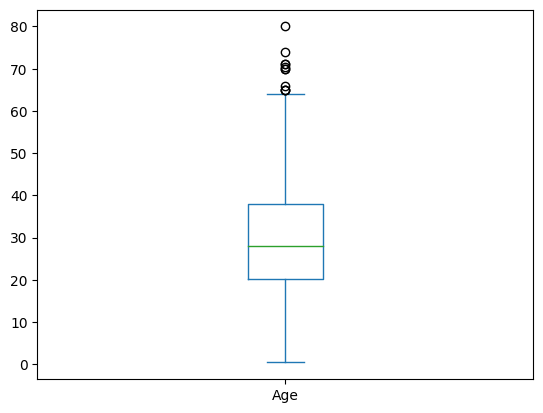

In [138]:
#entendendo como está a distribuição dos dados de idade
titanic_train.Age.plot.box()

Podemos perceber que a maior concentração está entre os 20 e 38 anos

<Axes: ylabel='Frequency'>

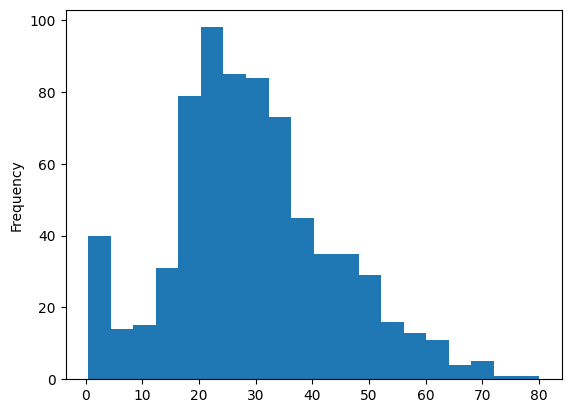

In [139]:
titanic_train.Age.plot.hist(bins=20)

Com o histograma temos uma clareza maior, podemos ver que temos bastante bebês, poucas crianças e temos um crescimento de jovens até os adultos.

Sabemos que a média é 29 anos e a mediana é de 28 anos. Será que temos diferença se abrimos isso por classe dos passajeiros e/ou por gênero?

In [140]:
#Análise Multivariada
#verificando a média de idade por classe do Titanic

titanic_train.groupby(['Pclass', 'Sex'])['Age'].median() #Essa função vamos agrupar por classes e por idade e achar a média

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Vamos tratar os casos de `NaN` substituindo os valores pela mediana que calculamos acima.

In [141]:
titanic_train['Age'] = titanic_train.Age.fillna(titanic_train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
#Estamos filtrano a coluna 'Age', depois pegando os valores vazios de 'Age' usando a função FILLNA para preencher estes valores usamos a função Groupby e transform para fazer a mediana da idade de acordo com o Gênero e classe.

Agora ficou faltando apenas a coluna de cabines, mas eu acredito que não seja necessário, então eu vou retirar essa coluna do meu Dataset

In [142]:
#verificxando numeros novamente

titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [143]:
#analisando as cabines

titanic_train.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Podemos notar que as cabines não fazem muito sentido na análise e não é tão relevante, então eu vou retirar essa coluna da minha base.

In [144]:
titanic_train = titanic_train.drop(['Cabin'], axis=1)

In [145]:
#verificando se o data set não consta mais a coluna Cabine

titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [146]:
#verificando novamente
titanic_train.describe()

#podemos notar que na Tarifa (Fare) tem um valor muito fora 512.32, vamos verificar

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

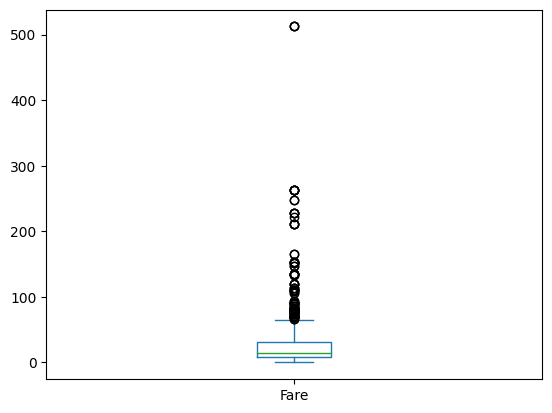

In [147]:
#outlier Fare

titanic_train.Fare.plot.box()

<Axes: ylabel='Frequency'>

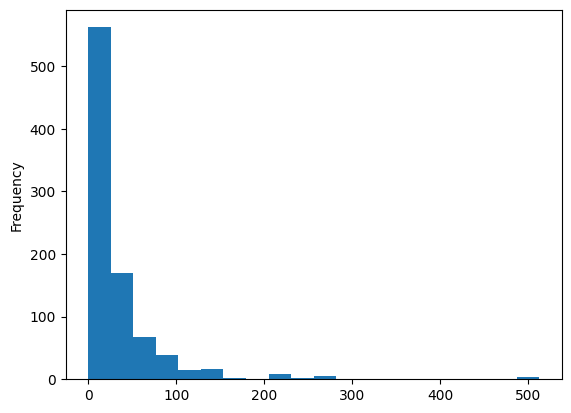

In [148]:
titanic_train.Fare.plot.hist(bins=20)

Podemos notas que os gráficos acima nos mostram que a maioria dos passageiros pagaram uma taxa inferior a `100,00`.

Mas temos esse outlier, vamos verificar o que são para identificamos o que podemos fazer

In [149]:
#filtrando o valor
titanic_train[titanic_train.Fare == titanic_train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C



Consultei novamente os valores na [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e os valores estão corretos, e fazem sentido são passageiros de primeira classe e provavelmente ficaram nas melhores cabines disponíveis na época.

## **Base final**

Vamos analisar como ficou nosso banco de dados, como podemos ver acima a base ainda têm duas colunas que eu julgo que não vai nos ajudar na predição quem sobreviveu são elas:  `PassengerId`, `Ticket` e `Embarked`

Essas colunas tem valores únicos para cada passageiro e isso mostra que não será necessário usa-lá. Porém vou deixar apenas a `PessengerId` para poder posteriormente comparar o resultado disso com o dataset `Gender_submission`

In [150]:
#excluindo as coluna Ticket e Embarked
titanic_train = titanic_train.drop(columns=['Ticket', 'Embarked'])

In [151]:
#visualizando a base final

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


Os modelos de machine learning não entendem variáveis do tipo `Object` vamos transformar os dos em números usando a função One-hot enconding

In [152]:
#codificando a coluna Sex
titanic_train = pd.get_dummies(titanic_train, columns=['Sex'], prefix='Sex')

no código acima, vamos transformar as variáveis `"male"` em `0` e `"famale"` em `1` e colocas em colunas separadas para a gente entender melhor a relação dos gênero com a sobrevivência.

In [153]:
#Verificando os nomes
titanic_train['Title'] = titanic_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Visualizando os títulos únicos
print(titanic_train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


No código acima utilizamos a função `apply(lambda x:` que acessa cada variável da coluna `'Name'` que é representado por `x`.

Depois aplicamos as funções `.split` para separar os titulos dos nomes como `"Braund, Mr. Owen Harris"` conseguimos deixar apenas o `"Mr."`







In [154]:
#convertendo os títulos em categorias mais gerais
titanic_train['Title'] = titanic_train['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_train['Title'] = titanic_train['Title'].replace('Mlle', 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Ms', 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Mme', 'Mrs')

In [155]:
#usando One-Hot Enconding para Title
titanic_train = pd.get_dummies(titanic_train, columns=['Title'], drop_first=True)

In [156]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,True,False,False


In [157]:
titanic_train = titanic_train.drop(['Name'], axis=1)

titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


Uma outra análise que podemos fazer agora é a `Matrix de Correlação`

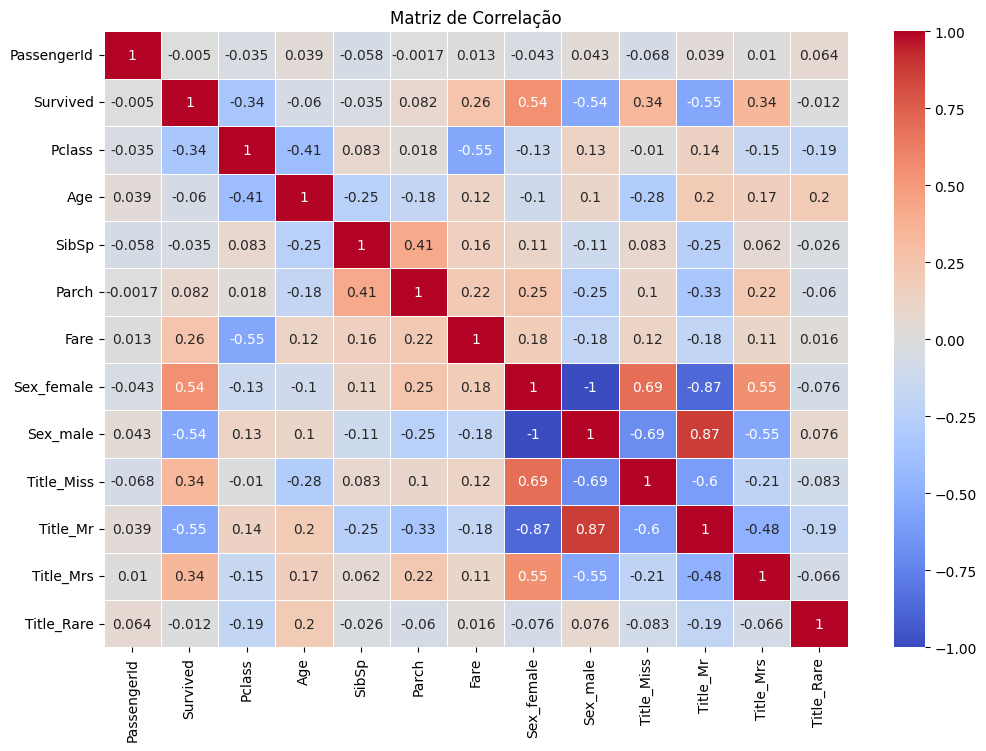

In [158]:
matriz_corr = titanic_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Aplicamos todas esses tratamentos de dados para a Tabela de Train, porém esse arquivo do Titanic conta com 3 arquivos

*   Train.csv
*   Test.csv
*   Gender_submission.csv - *esse terceiro dataset é o banco de dados onde temos o PessengerId e o Survived.*

Agora precisamos aplicar todo o tratamento de dados também para a base de Test.csv.

Mas será que temos os mesmos campos nulos no Test.csv?







In [159]:
titanic_test = pd.read_csv('test.csv')
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Através do `info()` podemos já notar que temos uma coluna diferente é a `"Fare"`, ela está com 1 dado faltante. Do restante temos `"Age"` e `"Cabin"` com dados faltantes igual no dataset `Train.csv`

Vamos confirmar esses valores Nulos e tratá-los

In [160]:
#verificar a Cardinalidade dos daddos
titanic_test.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [161]:
titanic_test.isnull().sum().sort_values(ascending=False).head()
#ISNUL para filtrar apenas valores nulos
#SUM para contar quantos valores nulos temos
#SORT_VALUES para ordenar as variaveis que mais tem nulos de cima para baixo

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0


In [162]:
#Como temos o mesmo campo de idade com nulos igual a Train, podemos fazer o mesmo tratamento da base Train

titanic_test['Age'] = titanic_test.Age.fillna(titanic_test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

Agora que tratamos a idade com os mesmos parâmetros da `"train.csv"`, podemos olhar esse valor único do `"Fare"`, Vamos buscar no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e vamos verificar o valor da Taxa que esse passageiro pagou


In [163]:
#verificando quem é o passageiro
titanic_test[titanic_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


após analisar o dado de Fare, vamos tratar o dado faltante, pois como é apenas uma única informação podemos inseri-la manualmente sem problemas.

In [164]:
titanic_test['Fare'] = titanic_test.Fare.fillna('7')

atribuindo o valor 7 na Taxa de passgeiro, o valor 7 é o que encontramos na enciclopedia titanica.


In [165]:
#confirmando a alteração de valor

titanic_test[titanic_test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7,NaN,S


In [166]:
#excluindo as colunas Ticket, Cabin e Embarked também da tabela Teste
titanic_test = titanic_test.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

Vamos aplicar a técnica de `One-Hot Encoding` na tabela de `test.csv`

In [167]:
#codificando a coluna Sex
titanic_test = pd.get_dummies(titanic_test, columns=['Sex'], prefix='Sex')

#separando os títulos
titanic_test['Title'] = titanic_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#convertendo os títulos em categorias mais gerais
titanic_test['Title'] = titanic_test['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_test['Title'] = titanic_test['Title'].replace('Mlle', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Ms', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Mme', 'Mrs')

#codificando Title
titanic_test = pd.get_dummies(titanic_test, columns=['Title'], drop_first=True)


In [168]:
#drop da coluna Name
titanic_test = titanic_test.drop(['Name'], axis=1)

In [169]:
#verificando o data set de Test

titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


In [170]:
#verificando se as duas tabelas estão iguais
titanic_train.columns.equals(titanic_test.columns)

False

Aqui vai dar `False`, pois o dataset de treino tem a coluna `"SurviveId"` e a teste não tem, justamente para a gente poder treinar o modelo para então testa-lo sem essa coluna target.

E Assim teremos as bases  finais para iniciar um modelo de Machine Learning

In [171]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


In [172]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


**Modelos preditivos**

Durante meu curso na coderhouse me foi apresentando varios modelos durante o curso, e agora eu vou aplica-los para entender qual prevê o melhor resultado e assim fazer uma melhor decisão.

Modelos que serão testados:



*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees
*   Random Forest
*   Support Vector Machine (SVM)
*   Gradient Boosting

Esses são os modelos mais populares para algoritmos supervisionados de Machine learning usados em tarefa de classificação, onde o objetivo é prever se o passageiro sobreviveu ou não(variável binária)


In [176]:
#Separando o modelo para treino e teste dos modelos

from sklearn.model_selection import train_test_split

X = titanic_train.drop('Survived', axis = 1)
y = titanic_train['Survived']

# separando a base em 30% para teste e instanciando 42 para quem rodar obter o mesmo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [177]:
#importando modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Logistic Regression**

Este modelo é usado para prever uma probabilidade de uma variavél de saída binária, ela usa a função sigmoide que prevê um resultado entre `0` e `1`.




In [178]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-Nearest Neighbors (KNN)**

Este modelo é usado para classificar um novo dado comparando com o dado de treinamento, ele busca os `k` vizinhos mais próximos (em termos de distância) no espaço das features e classifica o dado com base no mais comum entre os vizinhos.





In [182]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

**Decision Tree**

Este modelo divide os dados em subsets baseados em regras condicionais, cada nó da árvore representa uma condição da decisão , e as folhas representam as classificações finais.

Temos que só tomar cuidado para não dar Overfitting, que é ajustar demais os dados, se a arvore for muito profunda

In [183]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree =  decision_tree.predict(X_test)
accuracy_decision_tree =  accuracy_score(y_test, y_pred_decision_tree)

**Random Forest**

Este modelo é um ensemble de muitas arvóres de decisão, ele treina várias árvores em subconjutos diferentes de dados e combina suas previsões, usando a maioria dos resultados para a classificação. Ele é mais potente que o Decision Tree e muito bom contra Overfitting

In [184]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

**Support Vector Machine (SVM)**

Este modelo busca encontrar um hiperplano que melhor separa as classes no espaço de features. Ele maximiza a margem entre as classes e os dados  mais próximos do vetores de suporte.

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)
accuracy_svm = accuracy_score(y_train, y_pred_svm)

**Gradient Boosting**

Este modelo é muito parecido com o Random Forest, pois ele usa o mesmo método de ensemble, mas as árvores são treinadas em sequencia, e cada nova árvore tenta corrigir os erros da árvore anterior, assim otimizando a função de perda.

Mas ela é muito sucetível a overfitting se não for bem regulada.

In [186]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_train)
accuracy_gradient_boosting = accuracy_score(y_train, y_pred_gradient_boosting)